# Task 3

## Task: Geographic Analysis
  
## Plot the locations of restaurants on a map using longitude and latitude coordinates.

##  Identify any patterns or clusters of restaurants in specific areas.

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np
from geodatasets import get_path
import folium
from folium.plugins import heat_map

# Load the data
url = "https://drive.google.com/file/d/1dKZxapT3xLzOTOpy1LCyqctL8YEvzp4Y/view?usp=drive_link"
url = "https://drive.google.com/uc?id=" + url.split("/")[-2]
df = pd.read_csv(url)

df = df.fillna({'Cuisines': "unknown"})

df.head()

In [16]:
print(df[['Latitude', 'Longitude']])

       Latitude   Longitude
0     14.565443  121.027535
1     14.553708  121.014101
2     14.581404  121.056831
3     14.585318  121.056475
4     14.584450  121.057508
...         ...         ...
9546  41.022793   28.977392
9547  41.009847   29.041297
9548  41.055817   29.034640
9549  41.057979   29.036019
9550  40.984776   29.026016

[9551 rows x 2 columns]


In [22]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Plot the locations of restaurants on a map using longitude and latitude coordinates.

In [17]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")

In [ ]:
print(gdf.head())

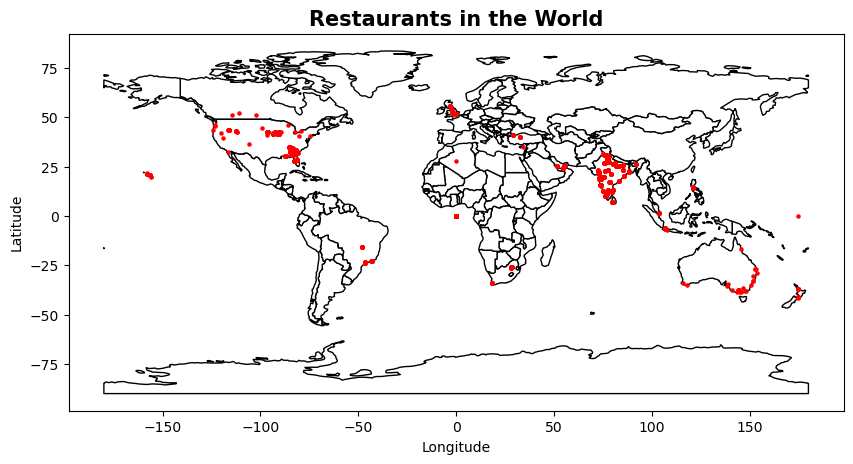

In [36]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(10, 5))
gdf.plot(ax=ax, color='red', markersize=5, marker='o')
plt.title("Restaurants in the World", fontsize=15, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig("restaurants_in_the_world.png", dpi=300)
plt.show()

##  Identify any patterns or clusters of restaurants in specific areas.

In [46]:
import folium
from folium.plugins import HeatMap

# DataFrame containing 'Latitude' and 'Longitude' columns
world_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=1)

In [51]:
# Create the heat marker data
heat_marker = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]

# Create a heat map and add it to the world map
HeatMap(heat_marker, radius=10).add_to(world_map)

# Display the map (if you're in a Jupyter Notebook)
world_map